In [30]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [31]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

In [32]:
dataset = Data()

In [33]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [34]:
#def criterion(yhat, y):
#    return torch.mean((yhat - y) ** 2)

criterion = nn.MSELoss()

In [35]:
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [36]:
model = linear_regression(1, 1)

In [37]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [38]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [0, 1]}]}

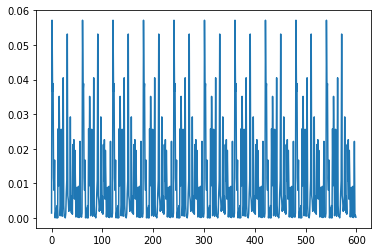

In [40]:
LOSS_BGD = []

def train_model_batch_gd(iter):
    for epoch in range(iter):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS_BGD.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    plt.plot(LOSS_BGD)
    plt.show()

train_model_batch_gd(10)